### Import the required packages

In [55]:
#basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#modelling
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

### Read the Explored dataframe

In [22]:
df = pd.read_csv('data/Explored_train.csv')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


### split the dataframe as features and target

In [23]:
features, target = df.drop(columns=['SalePrice'], axis=1), df['SalePrice']

### Identify the numaric columns and catagorical columns in features

In [24]:
num_feature_names = features.select_dtypes(exclude='object').columns
cat_feature_names = features.select_dtypes(include='object').columns

print('Number of numarical features: ', len(num_feature_names))
print('Number of catagorical features: ', len(cat_feature_names))
print('numaric features are ', num_feature_names)
print('catagorical features are ', cat_feature_names)

Number of numarical features:  36
Number of catagorical features:  37
numaric features are  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')
catagorical features are  Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'Bs

### Create a pipeline for data transformation

In [44]:
encoder = OneHotEncoder()
scaler = StandardScaler()

preprocessor = ColumnTransformer([
    ('OneHotEncoder', encoder, cat_feature_names),
    ('StanderdScaler', scaler, num_feature_names),
])

transformed_features = preprocessor.fit_transform(features).toarray()

### Seprate the transformed features and target into train test split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(transformed_features, target, test_size=0.2, random_state=42)

print('number of rows in x_train: ', len(x_train))
print('number of rows in x_test: ', len(x_test))
print('number of rows in y_train: ', len(y_train))
print('number of rows in y_test: ', len(y_test))

number of rows in x_train:  1168
number of rows in x_test:  292
number of rows in y_train:  1168
number of rows in y_test:  292


### Create model evaluation function wit the metrics `MAE`, `MSE`, `RMSE`

In [56]:
def evaluate_model(actual_value, predicted_value):
    mse = mean_squared_error(actual_value, predicted_value)
    rmse = np.sqrt(mean_squared_error(actual_value, predicted_value))
    mae = mean_absolute_error(actual_value, predicted_value)
    r2_square = r2_score(actual_value, predicted_value)
    return mse, rmse, mae, r2_square

### train and evaluate all the models

In [60]:
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
}

model_list = []
train_mse_list = []
train_rmse_list = []
train_mae_list = []
train_r2_square_list = []
test_mse_list = []
test_rmse_list = []
test_mae_list = []
test_r2_square_list = []


for i in range(len(list(models))):
    # initiate mode
    model = list(models.values())[i]
    model.fit(x_train, y_train)

    # make prediction
    y_train_prd = model.predict(x_train)
    y_test_prd = model.predict(x_test)

    # evaluate the model
    train_mse, train_rmse, train_mae, train_r2_square = evaluate_model(y_train, y_train_prd)
    test_mse, test_rmse, test_mae, test_r2_square = evaluate_model(y_test, y_test_prd)

    # append the model
    model_list.append(list(models.keys())[i])

    #append the evaluation metrics
    train_mse_list.append(train_mse)
    train_rmse_list.append(train_rmse)
    train_mae_list.append(train_mae)
    train_r2_square_list.append(train_r2_square)
    test_mse_list.append(test_mse)
    test_rmse_list.append(test_rmse)
    test_mae_list.append(test_mae)
    test_r2_square_list.append(test_r2_square)

### Vishualize the results with respective models

In [61]:
Result_dataset = pd.DataFrame({
    "Model": model_list,
    "Train_MSE": train_mse_list,
    "Test_MSE": test_mse_list,
    "Train_RMSE": train_rmse_list,
    "Test_RMSE": test_rmse_list,
    "Train_MAE": train_mae_list,
    "Test_MAE": test_mae_list,
    "Train_R2_Square": train_r2_square_list,
    "Test_R2_Square": test_r2_square_list
})

Result_dataset[['Model', 'Train_RMSE', 'Test_RMSE', 'Train_R2_Square', 'Test_R2_Square']]

,Model,Train_RMSE,Test_RMSE,Train_R2_Square,Test_R2_Square
0,Linear Regression,19938.799110,4.567150e+14,0.933347,-2.719423e+19
1,K-Neighbors Regressor,31632.579164,3.851088e+04,0.832239,8.066460e-01
2,Decision Tree Regressor,0.000000,4.327226e+04,1.000000,7.558789e-01
3,Random Forest Regressor,11466.582413,2.959065e+04,0.977956,8.858450e-01
4,XGBRegressor,1183.757328,2.572988e+04,0.999765,9.136899e-01
5,CatBoosting Regressor,5752.350224,2.743765e+04,0.994452,9.018523e-01
6,AdaBoost Regressor,27378.057826,3.593371e+04,0.874331,8.316588e-01


### Let's take XGBRegressor, Because of low `RMSE` and high `R2_Square` of rain as well as test

In [63]:
final_model = XGBRegressor()
final_model.fit(x_train, y_train)
y_prd = final_model.predict(x_test)
r2_square = r2_score(y_test, y_prd)
print('Accuracy of the model is {:.2f}'.format(r2_square))

Accuracy of the model is 0.91


### Lets plot the model with y_test and y_prd

<Axes: xlabel='SalePrice'>

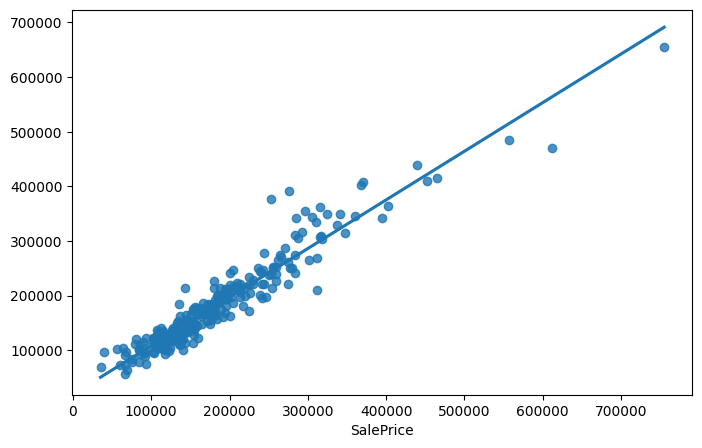

In [71]:
fig = plt.figure(figsize=(8, 5))
sns.regplot(x=y_test, y=y_prd, ci=None)

### Difference between the actual and predicted value

In [72]:
prd_df = pd.DataFrame({
    "Actual vlaue": y_test,
    "Pridicted valu": y_prd,
    "Difference": y_test - y_prd
})

prd_df

,Actual vlaue,Pridicted valu,Difference
892,154500,148121.562500,6378.437500
1105,325000,349802.812500,-24802.812500
413,115000,125030.484375,-10030.484375
522,159000,176531.437500,-17531.437500
1036,315500,308115.125000,7384.875000
...,...,...,...
479,89471,114488.062500,-25017.062500
1361,260000,240424.531250,19575.468750
802,189000,175564.765625,13435.234375
651,108000,121361.414062,-13361.414062
